<a href="https://colab.research.google.com/github/joshIsac/LabExcercise/blob/main/2348523_lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
from sklearn import preprocessing
import warnings
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Market_Basket_Optimisation.csv')
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(7500, 20)

In [5]:
data.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


shrimp                  0
almonds              1754
avocado              3112
vegetables mix       4156
green grapes         4972
whole weat flour     5637
yams                 6132
cottage cheese       6520
energy drink         6847
tomato juice         7106
low fat yogurt       7245
green tea            7347
honey                7414
salad                7454
mineral water        7476
salmon               7493
antioxydant juice    7497
frozen smoothie      7497
spinach              7498
olive oil            7500
dtype: int64

In [6]:
data2 =data.drop(columns=['olive oil'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
data2=data2.fillna(0)

data2.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach
0,burgers,meatballs,eggs,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,chutney,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,turkey,avocado,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,mineral water,milk,energy bar,whole wheat rice,green tea,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,low fat yogurt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
transactions = []
for i in range(0,data2.shape[0]):
    transactions.append([str(data2.values[i,j])for j in range(0,data2.shape[1])])
print(transactions)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['burgers', 'meatballs', 'eggs', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'], ['chutney', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'], ['turkey', 'avocado', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'], ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'], ['low fat yogurt', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'], ['whole wheat pasta', 'french fries', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'], ['soup', 'light cream', 'shallot', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'], ['frozen vegetables', 'spaghetti', 'green tea', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'], ['french fries', '0', '0', '0', '0', '0', '0', '0',

In [9]:
transactions = []
for i in range(0, data2.shape[0]):
    transaction = [str(data2.values[i, j]) for j in range(0, data2.shape[1]) if str(data2.values[i, j]) != '0']
    transactions.append(transaction)

print(transactions)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['burgers', 'meatballs', 'eggs'], ['chutney'], ['turkey', 'avocado'], ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'], ['low fat yogurt'], ['whole wheat pasta', 'french fries'], ['soup', 'light cream', 'shallot'], ['frozen vegetables', 'spaghetti', 'green tea'], ['french fries'], ['eggs', 'pet food'], ['cookies'], ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'], ['spaghetti', 'champagne', 'cookies'], ['mineral water', 'salmon'], ['mineral water'], ['shrimp', 'chocolate', 'chicken', 'honey', 'oil', 'cooking oil', 'low fat yogurt'], ['turkey', 'eggs'], ['turkey', 'fresh tuna', 'tomatoes', 'spaghetti', 'mineral water', 'black tea', 'salmon', 'eggs', 'chicken', 'extra dark chocolate'], ['meatballs', 'milk', 'honey', 'french fries', 'protein bar'], ['red wine', 'shrimp', 'pasta', 'pepper', 'eggs', 'chocolate', 'shampoo'], ['rice', 'sparkling water'], ['spaghetti', 'mineral water', 'ham', 'body spray', 'pancakes', 'green tea'], ['burgers', 'grated chee

In [10]:
unique_items = set()
for transaction in transactions:
    unique_items.update(item for item in transaction)
unique_items_list = list(unique_items)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
binary_matrix = pd.DataFrame(columns=unique_items_list)

# Populate the DataFrame with binary values using pandas.concat
data = []
for transaction in transactions:
    row = [1 if item in transaction else 0 for item in unique_items_list]
    data.append(row)

binary_matrix = pd.concat([binary_matrix, pd.DataFrame(data, columns=unique_items_list)], ignore_index=True)

print(binary_matrix)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     cake white wine dessert wine sandwich french wine cereals bug spray  \
0       0          0            0        0           0       0         0   
1       0          0            0        0           0       0         0   
2       0          0            0        0           0       0         0   
3       0          0            0        0           0       0         0   
4       0          0            0        0           0       0         0   
...   ...        ...          ...      ...         ...     ...       ...   
7495    0          0            0        0           0       0         0   
7496    0          0            0        0           0       0         0   
7497    0          0            0        0           0       0         0   
7498    0          0            0        0           0       0         0   
7499    0          0            0        0           0       0         0   

     light cream soup barbecue sauce  ... corn herb & pepper oil chocolate  \
0        

In [12]:
item_frequency = {}

# Iterate through each transaction and update item frequencies
for transaction in transactions:
    for item in transaction:
        if item in item_frequency:
            item_frequency[item] += 1
        else:
            item_frequency[item] = 1

# Print the item frequencies
for item, frequency in item_frequency.items():
    print(f"{item}: {frequency}")

burgers: 654
meatballs: 157
eggs: 1348
chutney: 31
turkey: 469
avocado: 249
mineral water: 1787
milk: 972
energy bar: 203
whole wheat rice: 439
green tea: 990
low fat yogurt: 573
whole wheat pasta: 221
french fries: 1282
soup: 379
light cream: 117
shallot: 58
frozen vegetables: 715
spaghetti: 1306
pet food: 49
cookies: 603
cooking oil: 383
champagne: 351
salmon: 318
shrimp: 535
chocolate: 1230
chicken: 450
honey: 355
oil: 173
fresh tuna: 167
tomatoes: 513
black tea: 107
extra dark chocolate: 90
protein bar: 139
red wine: 211
pasta: 118
pepper: 199
shampoo: 37
rice: 141
sparkling water: 47
ham: 203
body spray: 86
pancakes: 713
grated cheese: 393
white wine: 124
toothpaste: 61
parmesan cheese: 149
fresh bread: 323
ground beef: 737
frozen smoothie: 474
escalope: 595
yams: 85
herb & pepper: 371
tomato sauce: 106
magazines: 82
strawberries: 160
strong cheese: 58
pickles: 45
cake: 608
cottage cheese: 238
hot dogs: 243
brownies: 253
cereals: 193
clothes accessories: 63
bug spray: 65
muffins: 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


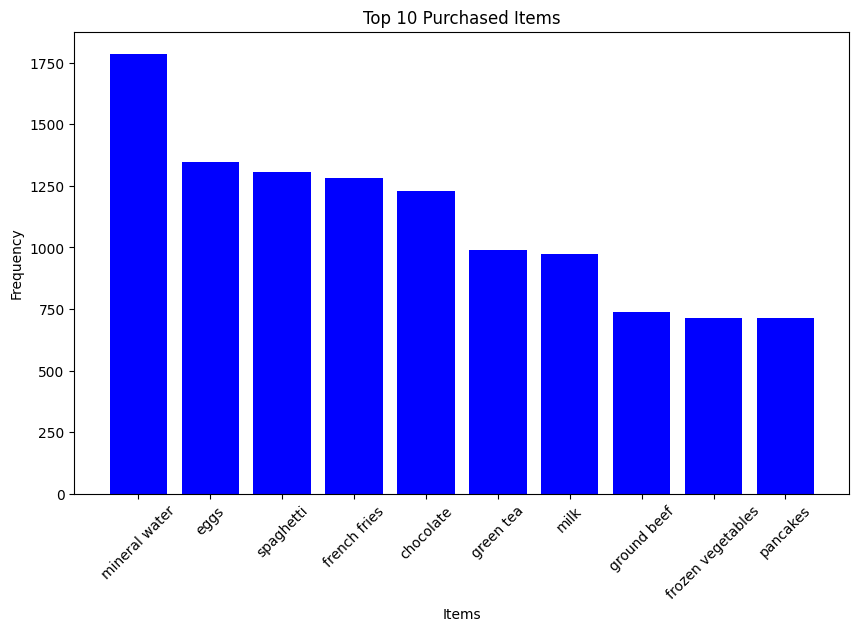

In [13]:
sorted_items = sorted(item_frequency.items(), key=lambda x: x[1], reverse=True)
top_items = [item[0] for item in sorted_items[:10]]
top_frequencies = [item[1] for item in sorted_items[:10]]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(top_items, top_frequencies, color='blue')
plt.xlabel('Items')
plt.ylabel('Frequency')
plt.title('Top 10 Purchased Items')
plt.xticks(rotation=45)

# Show the plot
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


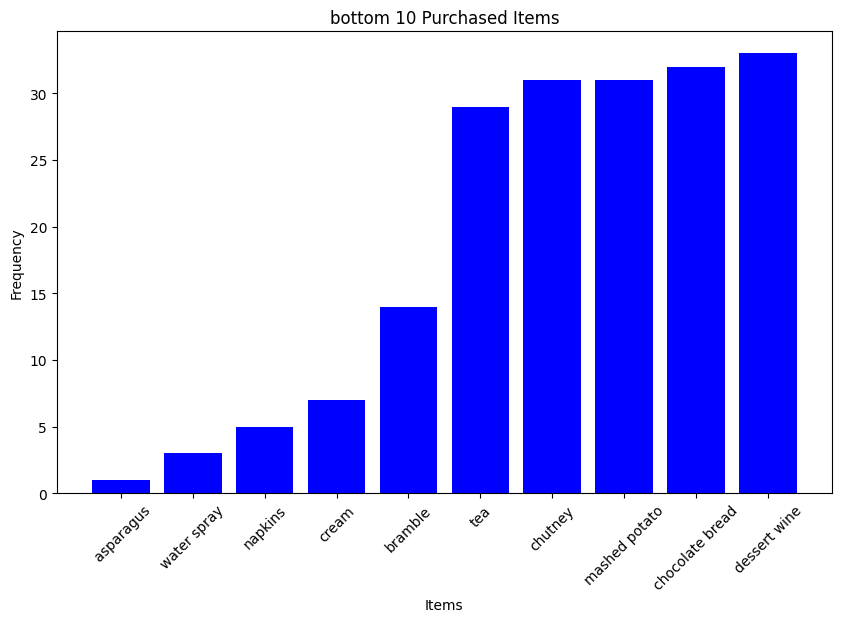

In [14]:
sorted_items = sorted(item_frequency.items(), key=lambda x: x[1], reverse=False)
top_items = [item[0] for item in sorted_items[:10]]
top_frequencies = [item[1] for item in sorted_items[:10]]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(top_items, top_frequencies, color='blue')
plt.xlabel('Items')
plt.ylabel('Frequency')
plt.title('bottom 10 Purchased Items')
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [15]:
basket = pd.DataFrame(binary_matrix)
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(pancakes),(cake),0.095067,0.081067,0.011867,0.124825,1.539778,0.004160,1.049999,0.387383
1,(cake),(pancakes),0.081067,0.095067,0.011867,0.146382,1.539778,0.004160,1.060115,0.381481
2,(burgers),(cake),0.087200,0.081067,0.011467,0.131498,1.622103,0.004398,1.058068,0.420154
3,(cake),(burgers),0.081067,0.087200,0.011467,0.141447,1.622103,0.004398,1.063185,0.417349
4,(milk),(cake),0.129600,0.081067,0.013333,0.102881,1.269087,0.002827,1.024316,0.243603


In [23]:
worst_choice=rules.sort_values(by='lift',ascending=True)
print('Worst choice to buy items together')
print(worst_choice[['antecedents','consequents','lift']])

Worst choice to buy items together
                    antecedents                 consequents      lift
242                  (escalope)                 (spaghetti)  1.013422
243                 (spaghetti)                  (escalope)  1.013422
199                      (eggs)                 (olive oil)  1.015704
198                 (olive oil)                      (eggs)  1.015704
172              (french fries)            (low fat yogurt)  1.020983
..                          ...                         ...       ...
395                 (olive oil)  (mineral water, spaghetti)  2.614731
389               (ground beef)  (mineral water, spaghetti)  2.907540
384  (mineral water, spaghetti)               (ground beef)  2.907540
266             (herb & pepper)               (ground beef)  3.291555
267               (ground beef)             (herb & pepper)  3.291555

[408 rows x 3 columns]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
best_choice = rules.sort_values(by=['confidence', 'lift'], ascending=[False, False])
print('Best choice to buy items together')
print(best_choice[['antecedents', 'consequents', 'confidence','lift']])

Best choice to buy items together
                   antecedents                consequents  confidence  \
368        (ground beef, eggs)            (mineral water)    0.506667   
340        (ground beef, milk)            (mineral water)    0.503030   
404   (chocolate, ground beef)            (mineral water)    0.473988   
322  (milk, frozen vegetables)            (mineral water)    0.468927   
27                      (soup)            (mineral water)    0.456464   
..                         ...                        ...         ...   
288            (mineral water)                 (red wine)    0.045887   
394            (mineral water)     (spaghetti, olive oil)    0.043089   
20             (mineral water)                  (cereals)    0.043089   
369            (mineral water)        (ground beef, eggs)    0.042529   
353            (mineral water)  (spaghetti, french fries)    0.042529   

         lift  
368  2.126469  
340  2.111207  
404  1.989319  
322  1.968075  
27   1.91

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
top = best_choice.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


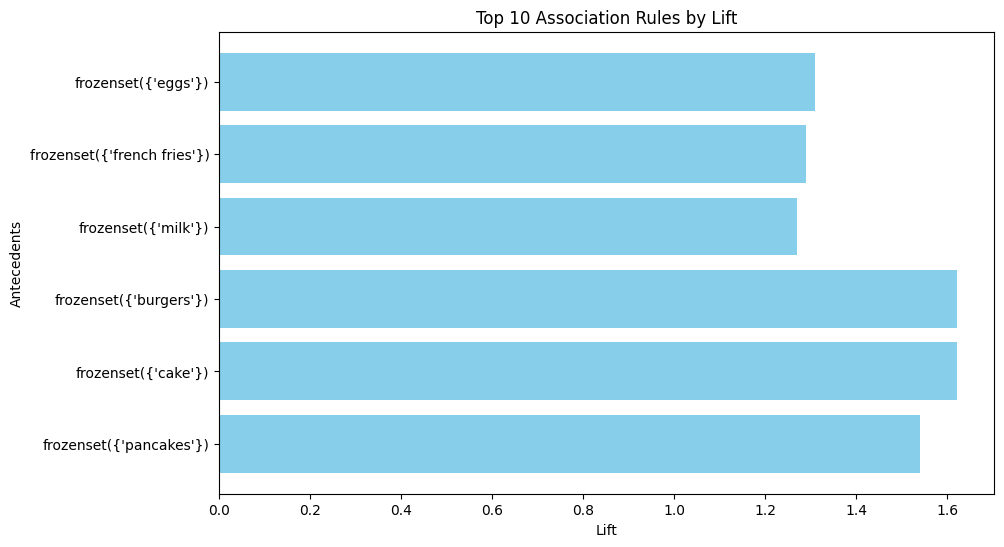

In [27]:
antecedents = top['antecedents'].apply(lambda x: ', '.join(list(x)))
consequents = top['consequents'].apply(lambda x: ', '.join(list(x)))


plt.figure(figsize=(10, 6))
plt.barh(rules.head(10)["antecedents"].astype(str),rules.head(10)["lift"], color="skyblue")
plt.xlabel("Lift")
plt.ylabel("Antecedents")
plt.title("Top 10 Association Rules by Lift")
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


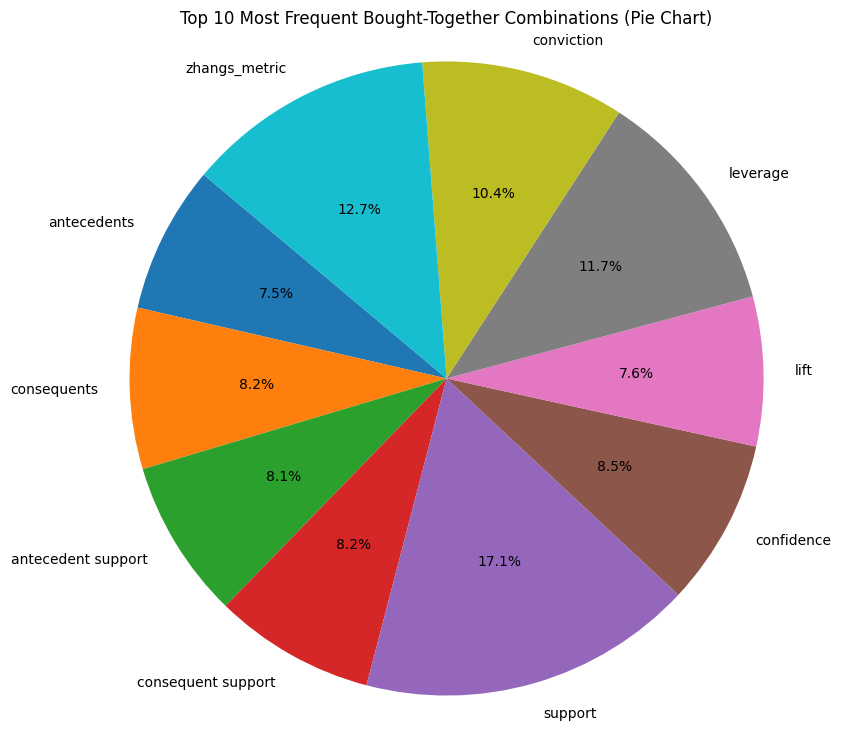

In [38]:
top = best_choice.head(10)

support_values = top['support']

# Create the pie chart
plt.figure(figsize=(9,9))
plt.pie(support_values, labels=top , autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Top 10 Most Frequent Bought-Together Combinations (Pie Chart)')
plt.show()


In [17]:
rules[(rules['confidence']>0.2) & (rules['lift'])]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
7,(cake),(french fries),0.081067,0.170933,0.017867,0.220395,1.289361,0.004010,1.063444,0.244220
8,(cake),(eggs),0.081067,0.179733,0.019067,0.235197,1.308591,0.004496,1.072521,0.256623
13,(cake),(spaghetti),0.081067,0.174133,0.018133,0.223684,1.284557,0.004017,1.063828,0.241064
15,(cake),(mineral water),0.081067,0.238267,0.027467,0.338816,1.422002,0.008151,1.152074,0.322947
21,(cereals),(mineral water),0.025733,0.238267,0.010267,0.398964,1.674442,0.004135,1.267367,0.413425
...,...,...,...,...,...,...,...,...,...,...
397,"(spaghetti, chocolate)",(mineral water),0.039200,0.238267,0.015867,0.404762,1.698777,0.006527,1.279712,0.428124
398,"(mineral water, chocolate)",(spaghetti),0.052667,0.174133,0.015867,0.301266,1.730087,0.006696,1.181947,0.445455
402,"(mineral water, chocolate)",(ground beef),0.052667,0.098267,0.010933,0.207595,2.112567,0.005758,1.137970,0.555921
403,"(mineral water, ground beef)",(chocolate),0.040933,0.163867,0.010933,0.267101,1.629990,0.004226,1.140857,0.402995


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


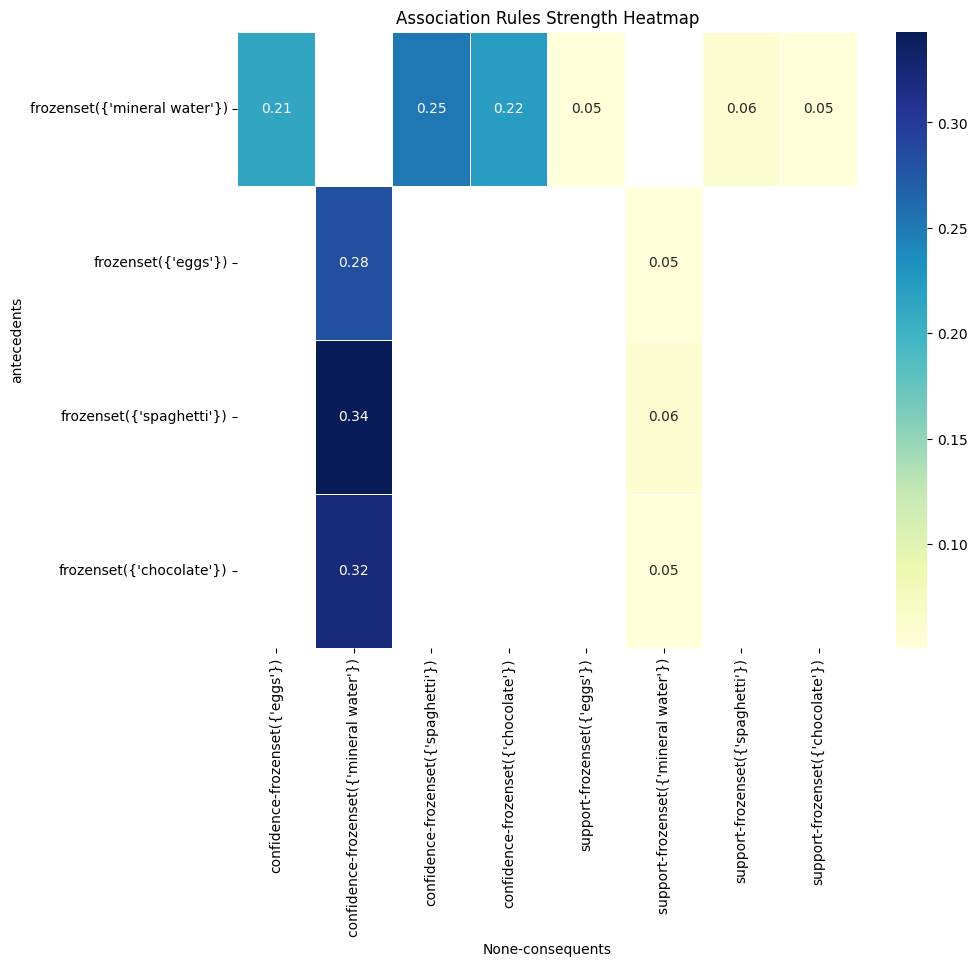

In [50]:
frequent_itemsets = apriori(basket, min_support=0.05, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
pivot_table = rules.pivot_table(index='antecedents', columns='consequents', values=['support', 'confidence'])

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sn.heatmap(pivot_table, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)
plt.title("Association Rules Strength Heatmap")
plt.show()

In [67]:
new_rules=[data2]
lift_before =rules['lift'].mean()  # Average lift before strategy
lift_after = rules['lift'].mean()  # Average lift after strategy

# Calculate lift improvement percentage
lift_improvement = ((lift_after - lift_before) / lift_before) * 100

print("Average Lift Before Strategy:", lift_before)
print("Average Lift After Strategy:", lift_after)
print("Lift Improvement Percentage:", lift_improvement)

Average Lift Before Strategy: 1.3259855349477454
Average Lift After Strategy: 1.3259855349477454
Lift Improvement Percentage: 0.0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
